# Arbol de decisión para especies de flores
* Se utilizan para regresiones logísticas (variables categoricas)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('F:/BD/GitHub/mlearningcourse/datasets/iris/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

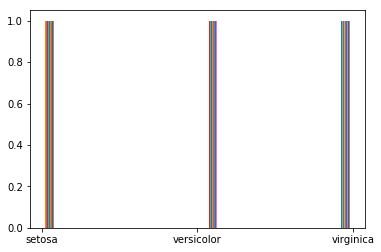

In [4]:
plt.hist(data.Species)

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()  # Enlistamos el nombre de las columnas
predictors = colnames[:4]   # Seleccionamos las columnas predictoras (0 a 3)
target = colnames[4]  # Seleccionamos la columna a predecir (4)

#### Dividir el dataset en test y entrenamiento

In [7]:
import numpy as np

In [8]:
# Genera una distribución uniforme entre 0 y 1, y lo aplica  la longitud del data set; el data set de entrenamiento
# debe ser menor al 75 % del total de la distribución uniforme
data['is_train'] = np.random.uniform(0, 1,  len(data)) <= 0.75


In [9]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,False
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


         Porcentaje
is_train           
False        26.00%
True         74.00%


([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

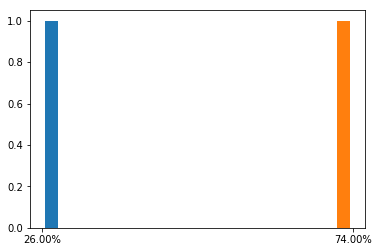

In [10]:
# Calcular porcentajes por columna

dist = pd.DataFrame({'Porcentaje': (data.groupby(('is_train')).size() / len(data)) * 100}).applymap('{:.2f}%'.format)
print(dist)
plt.hist(dist)

In [11]:
# Dividir en dataframe en test y entrenamiento
train, test = data[data['is_train']==True], data[data['is_train']==False]

In [12]:
# Importar librería para árboles de clasificación
from sklearn.tree import DecisionTreeClassifier

In [13]:
# Método entropía (ID3)
# Mínimo de elementos para dividir (min_samples_split)
tree = DecisionTreeClassifier(criterion = 'entropy', 
                              min_samples_split= 20,   # Mínimo número de observaciones para dividir en subnodo (por defecto 2)
                              random_state = 99, 
                               )

# Crear árbol con el data set de entrenamiento
    # Seleccionar las variables predictoras
    # Seleccionar la variable a predecir
    
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [14]:
# Predicciones, en el dataset Test
preds= tree.predict(test[predictors])

In [15]:
# Tabla cruzada (actual representa los valores actuales, )
pd.crosstab(test[target], preds, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,12,0,0
versicolor,0,13,1
virginica,0,0,13


* De 12 versicolor, hubo 2 que el modelo marcó como virgínica
* De 6 que estaban como virginicas, las 6 se marcaron como virginicas en el modelo
* De 19 setosas, 19 se marcaron como setosas en el modelo

### Representación gráfica del árbol de decisión

In [16]:
from sklearn.tree import export_graphviz

In [17]:
# Crear archivo dot y exportarlo
with open('F:/Documentos/Python_Entrenamiento/Outputs/iris_dtree.dot', 'w') as dotfile:
    export_graphviz(tree, out_file = dotfile, feature_names= predictors)
    dotfile.close()

In [18]:
# Instalar / importar los paquetes necesarios
import os 
from graphviz import Source

In [19]:
# Representar archivo dot (acceder a archivos de sistema operativo)
file = open('F:/Documentos/Python_Entrenamiento/Outputs/iris_dtree.dot', 'r')
text = file.read()  # Leer todo el fichero
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.6\\nentropy = 1.585\\nsamples = 111\\nvalue = [38, 36, 37]"] ;\n1 [label="entropy = 0.0\\nsamples = 38\\nvalue = [38, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Length <= 4.85\\nentropy = 1.0\\nsamples = 73\\nvalue = [0, 36, 37]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Width <= 1.65\\nentropy = 0.316\\nsamples = 35\\nvalue = [0, 33, 2]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 32\\nvalue = [0, 32, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n3 -> 5 ;\n6 [label="Petal.Width <= 1.75\\nentropy = 0.398\\nsamples = 38\\nvalue = [0, 3, 35]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.985\\nsamples = 7\\nvalue = [0, 3, 4]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 31\\nvalue = [0, 0, 31]"] ;\n6 -> 8 ;\n}'

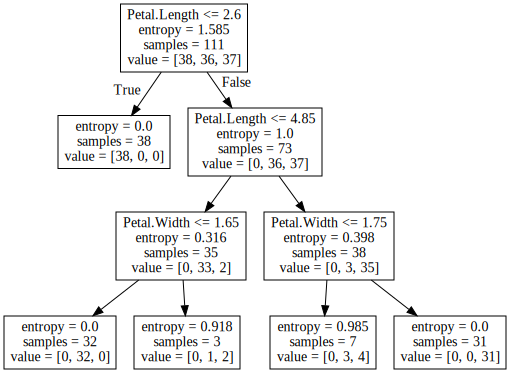

In [20]:
# Genera árbol de decisión
Source(text)

# La fecha hacia la izquierda tiene condición TRUE, derecha es FALSE
# Cada nodo tiene diferentes piezas de info (cómo la entropía)
# Número de muestras  (samples)
# Distribución de valores por tipo de flor [setosa	versicolor	virginica]


### Lectura
[Setosa, versicolor, virgínica]

* Si la longitud del pétalo es menor que 2.45, entonces la flor es setosa (sendero izquierdo)
* Si la longitud es mayor que 2.45 y el ancho del pétalo es mayor a 1.75, entonces es virgínica...

# Cross validation para la poda del árbol

In [21]:
X = data[predictors]
Y = data[target]

In [22]:
tree = DecisionTreeClassifier(criterion = 'entropy',   # Método entropía
                             max_depth = 5,            # Máximo de profundidad de árbol
                             min_samples_split= 20,    # Máximo de hojas por cada nivel de profundidad
                            random_state = 99)         # 
tree.fit(X,Y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [29]:
# Para hacer la validación cruzada
from sklearn.model_selection import KFold, cross_val_score

In [28]:
# Cross validation      
           # No. grupos 
cv = KFold(n_splits = 10,  shuffle = True, random_state = 1)

In [30]:
score = np.mean(cross_val_score(tree, X, Y, scoring = 'accuracy', cv = cv, n_jobs = 1))

In [31]:
# Promedio de las eficacias en cada uno de los jobs
score

0.9333333333333333

In [35]:
# Bucle para determinar cual es la mejor profundidad en el modelo
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion = 'entropy',   # Método entropía
                             max_depth = i,            # Máximo de profundidad de árbol
                             min_samples_split= 20,    # Máximo de hojas por cada nivel de profundidad
                            random_state = 99)         # 
    tree.fit(X,Y)
    cv = KFold(n_splits = 10,  shuffle = True, random_state = 1)
    score = cross_val_score(tree, X, Y, scoring = 'accuracy', cv = cv, n_jobs = 1)
    score = np.mean(score)
    print('Score para i: ',i,'es de',   score)
    print('   ', tree.feature_importances_, predictors)  # Rasgos

Score para i:  1 es de 0.5666666666666667
    [0. 0. 1. 0.] ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
Score para i:  2 es de 0.9200000000000002
    [0.         0.         0.66620285 0.33379715] ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
Score para i:  3 es de 0.9400000000000001
    [0.         0.         0.68976981 0.31023019] ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
Score para i:  4 es de 0.9333333333333333
    [0.         0.         0.66869158 0.33130842] ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
Score para i:  5 es de 0.9333333333333333
    [0.         0.         0.66869158 0.33130842] ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
Score para i:  6 es de 0.9333333333333333
    [0.         0.         0.66869158 0.33130842] ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
Score para i:  7 es de 0.9333333333333333
    [0.         0.         0.66869158 0.33130842] ['Sepal.Le

#### Lectura:
 * (ejemplo de la primera línea)
   * Quiere decir que el Score, con un nivel de profundidad = 1,  es 0.56 % (el modelo ajusta poco), y el predictor de mayor confianza para predecir es el de la tercera posición en el array de números [0, 0, **1**, 0], es decir, predicen mejor la longitud de los pétalos (Petal.Length).